## PCA and Clustering



Machine Learning -  Homework #5 - University of Memphis. Fall 2022  <br>
Last updated - Dec 1, 2022  <br>
Author Bereket Kebede, Graduate Student <br>


## Getting Started 
----

In [1]:
########################################################
# import necesarry libriaries

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Data preparation


1. Read the samples from MNIST_train.csv
2. Normalize the input samples before applying the dimensionality reduction and clustering approaches.

We will do data normalization, which is an essential part for balancing out the weights for our model. Data normalization helps the model converge to the minimum quicker for gradient descent.

In [3]:
########################################################
# import dataset

data=pd.read_csv("MNIST_train.csv") #load the data into a pandas dataframe, Read the samples from MNIST_train.csv
data.head(5) #Show the first 5 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = data.iloc[:,1:]
x_train = x_train/255.0 # normalization
print(x_train.shape)

(42000, 784)


## Feature Embedding using PCA


One of the most often used methods of linear dimension reduction is principal component analysis (PCA). It can be used both on its own and as a starting point for further dimension reduction techniques. By projecting the data onto a collection of orthogonal axes, the PCA method alters the data.

In [8]:
# compress 784 features to 50 using Prinicipal Component Analysis (PCA)

pca_model = PCA(n_components = 50)
pca_reduced = pca_model.fit_transform(x_train)
print(x_train.shape)
print(pca_reduced.shape)

(42000, 784)
(42000, 50)


## Clustering using K-means

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.The objective of K-means is to group similar data points together and discover underlying patterns.

In [9]:
kmeans_model = KMeans(n_clusters = 10)
label = kmeans_model.fit_predict(pca_reduced)

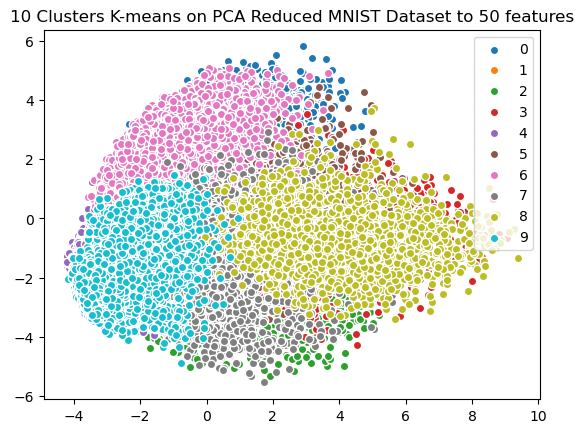

In [11]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results: 
for i in u_labels:
    plt.scatter(pca_reduced[label == i , 0] , pca_reduced[label == i , 1] , label = i, edgecolors='white')
plt.title('10 Clusters K-means on PCA Reduced MNIST Dataset to 50 features')
plt.legend()
plt.show()

## Clustering using tSNE 

In [14]:
tnse_model = TSNE(n_components = 2)
y_tnse = tnse_model.fit_transform(pca_reduced)

C:\Users\Berek\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Berek\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [16]:
y = data.loc[:,'label'].values

Text(0.5, 1.0, 'tSNE on PCA Reduced MNIST Dataset to 50 features')

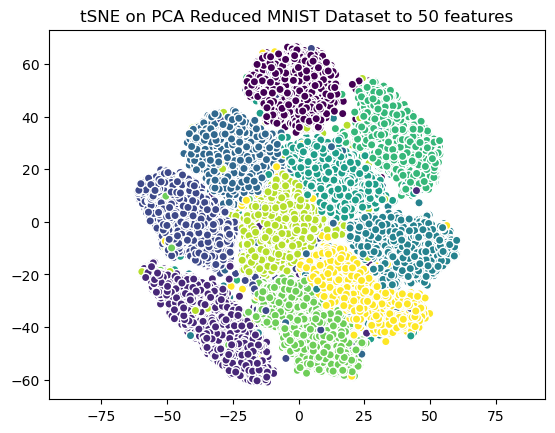

In [17]:
plt.scatter(y_tnse[:, 0], y_tnse[:, 1], c=y, edgecolors='white')
plt.gca().set_aspect('equal', 'datalim')
plt.title('tSNE on PCA Reduced MNIST Dataset to 50 features')

### References 

[1] PCA  <br>
[2] Implementing PCA and K-means  <br>
[3] Borders for scatter points in Matplotlib <br>
[4] tSNE  <br>
[5] plot tSNE for MNIST   <br>
[6] Normalization for MNIST  <br>



[1] https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html   <br>
[2] https://www.askpython.com/python/examples/plot-k-means-clusters-python  <br>
[3] https://stackoverflow.com/questions/50706901/matplotlib-border-around-scatter-plot-points  <br>
[4] https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html  <br>
[5] https://www.kaggle.com/code/parulpandey/visualizing-kannada-mnist-with-t-sne/notebook   <br>
[6] https://medium.com/@samdrinkswater/sequential-model-for-mnist-dataset-using-tensorflow-25e1fab87b48  <br>